In [1]:
# Step 1: Load and Preprocess the Data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "Mall_Customers.csv"  # Update with your file's location
data = pd.read_csv(file_path)

# Inspect data
print(data.info())
print(data.describe())

# Feature selection
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
selected_data = data[features]

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

print("Data preprocessing completed.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [2]:
# Step 2: PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

print("PCA completed.")


Explained Variance Ratio: [0.44266167 0.33308378 0.22425454]
PCA completed.


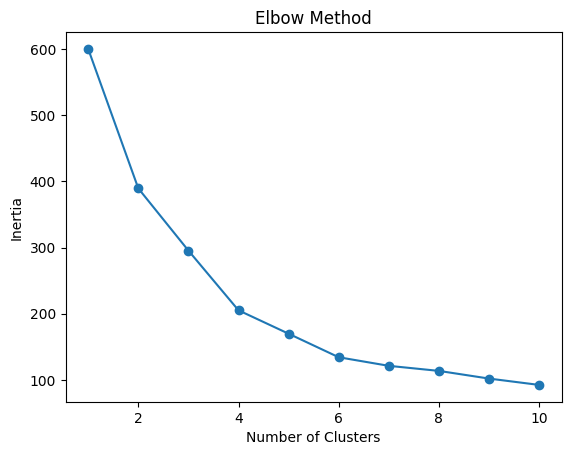

K-means clustering completed.


In [3]:
# Step 3: K-means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-means with optimal clusters
optimal_clusters = 3  # Based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

print("K-means clustering completed.")


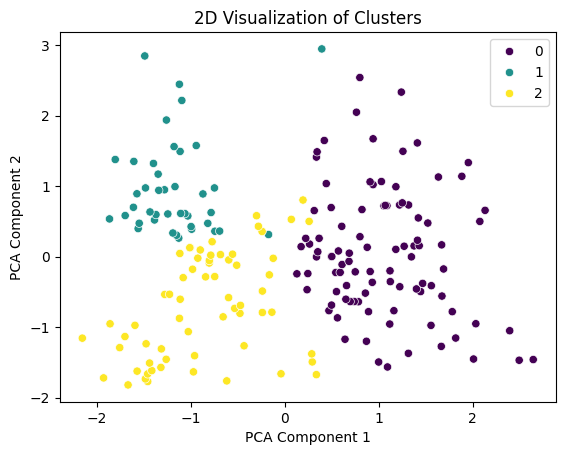

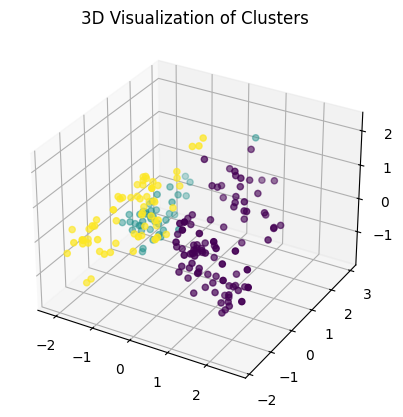

In [4]:
# Step 4: 2D and 3D Visualization
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 2D Scatter Plot
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("2D Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=kmeans_labels, cmap='viridis')
plt.title("3D Visualization of Clusters")
plt.show()


In [5]:
# Step 5: DBSCAN Clustering and Comparison
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

# Compare with Silhouette Score
kmeans_score = silhouette_score(pca_data, kmeans_labels)
dbscan_score = silhouette_score(pca_data, dbscan_labels)

print(f"K-means Silhouette Score: {kmeans_score}")
print(f"DBSCAN Silhouette Score: {dbscan_score}")


K-means Silhouette Score: 0.3579234303882264
DBSCAN Silhouette Score: 0.18451372756506043


In [11]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

# Streamlit App
st.title("Customer Segmentation")
uploaded_file = st.file_uploader("Upload your dataset (CSV)", type="csv")

if uploaded_file:
    # Load dataset
    data = pd.read_csv(uploaded_file)
    st.write("Dataset:")
    st.write(data.head())

    # Feature Selection
    features = st.multiselect("Select Features for Clustering:", options=data.columns.tolist())
    if len(features) < 2:
        st.warning("Please select at least two features.")
    else:
        # Preprocessing: Scaling
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data[features])

        # Dimensionality Reduction with PCA
        n_components = st.slider("Number of PCA Components:", 2, 3, 2)
        pca = PCA(n_components=n_components)
        pca_data = pca.fit_transform(scaled_data)
        st.write(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

        # Clustering Algorithm Selection
        clustering_algo = st.selectbox("Select Clustering Algorithm:", ["K-means", "DBSCAN"])

        if clustering_algo == "K-means":
            # K-means Clustering
            n_clusters = st.slider("Number of Clusters:", 2, 10, 3)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            labels = kmeans.fit_predict(pca_data)

            # Silhouette Score
            silhouette = silhouette_score(pca_data, labels)
            st.write(f"Silhouette Score: {silhouette}")

        elif clustering_algo == "DBSCAN":
            # DBSCAN Clustering
            eps = st.slider("Epsilon (eps):", 0.1, 5.0, 0.5)
            min_samples = st.slider("Minimum Samples:", 1, 20, 5)
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(pca_data)

            # Silhouette Score (if applicable)
            if len(set(labels)) > 1:  # DBSCAN might result in a single cluster
                silhouette = silhouette_score(pca_data, labels)
                st.write(f"Silhouette Score: {silhouette}")
            else:
                st.warning("DBSCAN resulted in a single cluster; Silhouette Score is not applicable.")

        # Visualizations
        st.subheader("Cluster Visualization")
        
        # 2D Plot
        st.write("2D Visualization:")
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette="viridis")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("2D Cluster Visualization")
        st.pyplot(plt)

        # 3D Plot (if 3 components)
        if n_components == 3:
            st.write("3D Visualization:")
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels, cmap='viridis')
            ax.set_xlabel("PCA Component 1")
            ax.set_ylabel("PCA Component 2")
            ax.set_zlabel("PCA Component 3")
            plt.title("3D Cluster Visualization")
            st.pyplot(fig)

        # Cluster Summary
        st.subheader("Cluster Summary")
        cluster_summary = pd.DataFrame({'Cluster': labels})
        for i, feature in enumerate(features):
            cluster_summary[feature] = data[feature]
        st.write(cluster_summary.groupby('Cluster').mean())


2024-12-07 18:24:27.292 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 18:24:28.691 
  command:

    streamlit run C:\Users\Mostafa Samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-07 18:24:28.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 18:24:28.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 18:24:28.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 18:24:28.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 18:24:28.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-0

In [ ]:
streamlit run main.py